<center> <h2> <font color='green'> Atividade 6.4 -- Continuação -- Maria Luísa </h2> </center> </font>

# <font color = 'orange'> 1. Pré-processamento

# <font color='orange'> Biblioteca </font>

In [59]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# <font color='orange'> Importar dados </font>


In [60]:
dados = pd.read_csv('Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [61]:
x = dados[["Maior65Anos","Conjuge","MesesDeContrato","TelefoneFixo","ServicoDeInternet","SegurancaOnline", "BackupOnline","SeguroNoDispositivo","SuporteTecnico","TVaCabo","StreamingDeFilmes","TipoDeContrato","PagamentoOnline","ContaMensal"]] #freatures

In [62]:
y = dados["Churn"] # classes
y.head()

0    Nao
1    Nao
2    Sim
3    Nao
4    Sim
Name: Churn, dtype: object

In [63]:
dados.shape

(7043, 18)

# <font color='orange'> 1.2. Observando as variáveis </font>

In [64]:
for col in dados.columns:
    print(col,dados[col].unique())

Maior65Anos [0 1]
Conjuge ['Sim' 'Nao']
Dependentes ['Nao' 'Sim']
MesesDeContrato [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
TelefoneFixo ['Nao' 'Sim']
VariasLinhasTelefonicas ['SemServicoTelefonico' 'Nao' 'Sim']
ServicoDeInternet ['DSL' 'FibraOptica' 'Nao']
SegurancaOnline ['Nao' 'Sim' 'SemServicoDeInternet']
BackupOnline ['Sim' 'Nao' 'SemServicoDeInternet']
SeguroNoDispositivo ['Nao' 'Sim' 'SemServicoDeInternet']
SuporteTecnico ['Nao' 'Sim' 'SemServicoDeInternet']
TVaCabo ['Nao' 'Sim' 'SemServicoDeInternet']
StreamingDeFilmes ['Nao' 'Sim' 'SemServicoDeInternet']
TipoDeContrato ['Mensalmente' 'UmAno' 'DoisAnos']
PagamentoOnline ['Sim' 'Nao']
FormaDePagamento ['ChequeDigital' 'ChequePapel' 'DebitoEmConta' 'CartaoDeCredito']
ContaMensal [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn ['Nao' 'Sim']


In [65]:
#modificação de forma manual

traducao_dic = {
    'Nao' : 0,
    'Sim' : 1
}

# colunas de classes binárias

dadosbinarios = dados[['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']].replace(traducao_dic)
dadosbinarios.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [66]:
# Tratar as colunas de classes multiplas
#utilizar o get_dummies
# axis = 1 -> representa coluna, o drop por padrão remove linhas
dados_sem_dadosbinarios = dados.drop(columns = ['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn'], axis = 1) # axis = 1 -> representa coluna, o drop por padrão remove linhas
dados_sem_dadosbinarios.head()

#convertendo colunas de classes multiplas
dummie_dados = pd.get_dummies(dados_sem_dadosbinarios)
dummie_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


In [67]:
dados_final = pd.concat([dadosbinarios,dummie_dados], axis = 1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


# <font color='orange'> 1.3 - Definição Formal </font>

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [68]:
#DICA
pd.set_option('display.max_columns', 39)

In [69]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [70]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $Ymaria$)

# <font color='orange'> 1.4 Balanceamento dos dados </font>

In [71]:
y = dados_final["Churn"] # classes
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

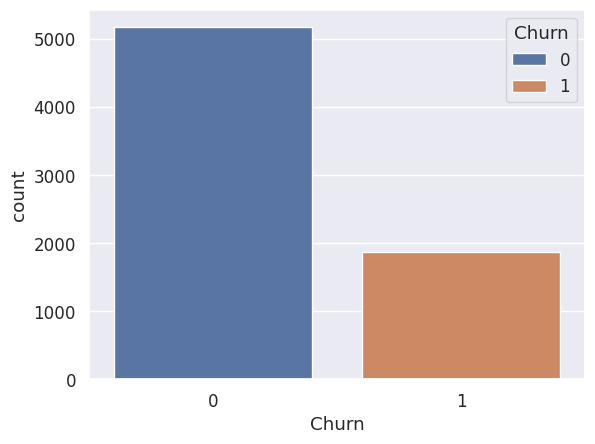

In [72]:
# variavel target está desbalanceada
import seaborn as sns
ax  = sns.countplot(x = 'Churn', hue = 'Churn', data = dados_final)

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

In [73]:
#biblioteca
from imblearn.over_sampling import SMOTE

In [74]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [75]:
SEED = 123
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [76]:
#junção dos dados balanceados
dados_final =pd.concat([X,y], axis = 1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0
2,0,0,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,1
3,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True,0
4,0,0,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,1


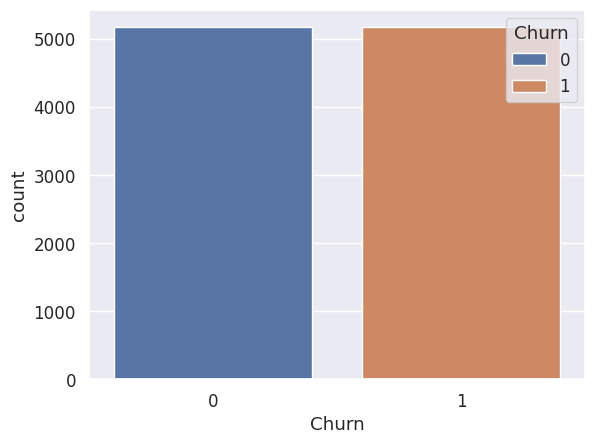

In [77]:
# verificação 2 - balanceamento
import seaborn as sns
ax  = sns.countplot(x = 'Churn', hue = 'Churn', data = dados_final)

# <font color='orange'> 2. SVC </font>


In [78]:
# importando bibliotecas

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separar freatures(X) e classes (y)

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

# normalizar dados (dados numericos) pré-processamento
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

# separar os treino e teste
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.3, random_state = SEED, stratify=y) #stratify -> É o balanceamento de divisão de classes

# instanciar o modelo
svc = SVC(gamma='auto', random_state=SEED) # gamma = 'auto' -> ajustar a curva
svc.fit(x_treino, y_treino)

#treinar o modelo
svc.fit(x_treino, y_treino)

#prever os dados de teste
y_pred = svc.predict(x_teste)

#testar o modelo
previsoes_svc = svc.predict(x_teste)

#usar modelo

Xmaria_normalizado = norm.transform(Xmaria)
print(svc.predict(Xmaria_normalizado))


#avaliar o modelo
accuracy_score(y_teste, y_pred)
from sklearn.metrics import accuracy_score

# Acurácia
#accuracy = accuracy_score(y_teste, y_pred)

# Imprimir a acurácia em porcentagem
#print(f"Acurácia: {accuracy * 100:.2f}%")


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# <font color = orange> 3. Método baseado K-nearest neighbors (KNN) - método baseado na proximidade </fonte>

In [79]:
# Importando bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar features (X) e classes (y)
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']


# Normalizar dados (dados numéricos) - pré-processamento
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)

# Separar treino e teste
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=SEED, stratify=y)  # stratify -> balanceamento de divisão de classes

# Instanciar o modelo KNN
knn = KNeighborsClassifier(metric='euclidean') #K é igual a 5 por padrão

# Treinar o modelo
knn.fit(x_treino, y_treino)

# Prever os dados de teste
previsoes_knn = knn.predict(x_teste)

# Avaliar o modelo
# Usar o modelo para prever novos dados
Xmaria_normalizado = norm.transform(Xmaria)
print(knn.predict(Xmaria_normalizado))


[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [80]:
print(Xmaria_normalizado)

[[-0.79008532 -0.52726104  0.32688889  0.81449258 -0.41318358 -1.14939314
  -0.97235197  1.00426111 -0.32688889 -0.93540224 -0.67423777  0.94470379
  -0.44850949  0.77819389 -0.44850949 -0.59625062 -1.0970768  -0.44850949
   1.3517849   0.91935908  2.22960721 -0.73991904 -1.27243223  2.22960721
  -0.60667885  1.08898545 -0.44850949 -0.84672335 -0.904075   -0.44850949
   1.16590099 -0.4605816  -1.45333425  2.1147664  -0.50805069 -0.94910918
  -0.54727528  1.8821746 ]]


## <font color = orange> 2.2 - KNN por trás dos panos

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [81]:
import numpy as np

# Definindo dois pontos no espaço k-dimensional
a = np.array([1, 2, 3])  # Ponto a
b = np.array([4, 5, 6])  # Ponto b

# Calculando a distância euclidiana
distancia = np.linalg.norm(a - b)

print("A distância euclidiana entre os pontos a e b é:", distancia)


A distância euclidiana entre os pontos a e b é: 5.196152422706632


# <font color = orange> 4. Método probabilístico

## <font color = orange> 4.1 - Teorema de Naive Bayes


$P(y|X)$ = ${P(X|y) + P(y) \over P(X)}$

In [82]:
# Importando bibliotecas
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separar features (X) e classes (y)
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

# Separar treino e teste
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)  # stratify -> balanceamento de divisão de classes

# Instanciar o modelo Naive Bayes Multinomial
naive_bayes = MultinomialNB()

# Treinar o modelo
naive_bayes.fit(x_treino, y_treino)

# Prever os dados de teste
previsoes_bnb = naive_bayes.predict(x_teste)

# Usar o modelo para prever novos dados
Xmaria = Xmaria  # Certifique-se de que Xmaria esteja definido
print(naive_bayes.predict(Xmaria))


[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


## <font color = orange> 4.2 - Modelo Bernoulli Naive Bayes

$P(xi|y)$ = P(i|y)xi + (1 - P(i|y))(1 - xi)

In [83]:
# Importando bibliotecas
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separar features (X) e classes (y)
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

# Separar treino e teste
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)  # stratify -> balanceamento de divisão de classes

# Instanciar o modelo Naive Bayes Multinomial
bnb = BernoulliNB()

# Treinar o modelo
bnb.fit(x_treino, y_treino)

# Prever os dados de teste
previsoes_bnb = naive_bayes.predict(x_teste)

# Usar o modelo para prever novos dados
Xmaria = Xmaria  # Certifique-se de que Xmaria esteja definido
print(bnb.predict(Xmaria))

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


# <font color = orange> 5. Método Simbólico

## <font color = orange> 5.1 - Por trás da árvore de decisão

In [84]:
# Importando bibliotecas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separar features (X) e classes (y)
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

# Separar treino e teste
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y)  # stratify -> balanceamento de divisão de classes

# Instanciar o modelo de árvore de decisão
decision_tree = DecisionTreeClassifier(random_state=SEED)

# Treinar o modelo
decision_tree.fit(x_treino, y_treino)

# Prever os dados de teste
previsoes_dct = decision_tree.predict(x_teste)

# Usar o modelo para prever novos dados
print(decision_tree.predict(Xmaria))


[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Critério de divisão dos nós

Para conseguir identificar qual o melhor momento em que um nó deve ser dividido em dois ou mais subnós, o algoritmo da árvore de decisão considera alguns critérios. Os dois principais critérios de divisão usados nas árvores de decisão são:

**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:


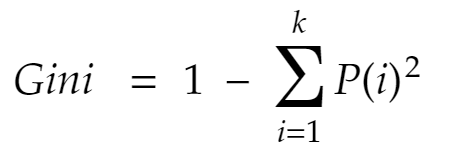

Onde:

p(i) representa a frequência relativa das classes em cada um dos nós;
k é o número de classes. Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

**Entropia***

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

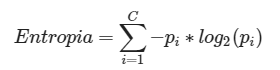


Onde:

pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i; c é o número de classes.

# <font color = orange> 6. Validação dos modelos

## <font color = orange> 6.1 - Matriz de confusão

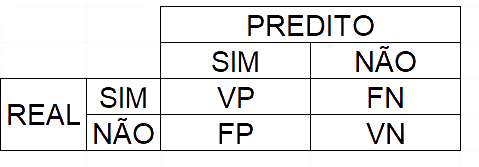

In [85]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
mc_svc = confusion_matrix(y_teste, previsoes_svc)
mc_knn = confusion_matrix(y_teste, previsoes_knn)
mc_bnb = confusion_matrix(y_teste, previsoes_bnb)
mc_dct = confusion_matrix(y_teste, previsoes_dct)
print(mc_svc,mc_knn,mc_bnb,mc_dct)

[[1323  230]
 [ 277 1275]] [[1243  310]
 [ 260 1292]] [[1132  421]
 [ 385 1167]] [[1249  304]
 [ 305 1247]]


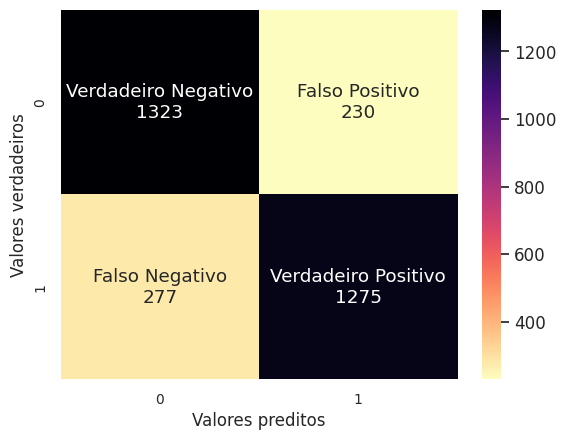

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)


categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

gerando_matriz(mc_svc, labels, categorias, cmap="magma_r")

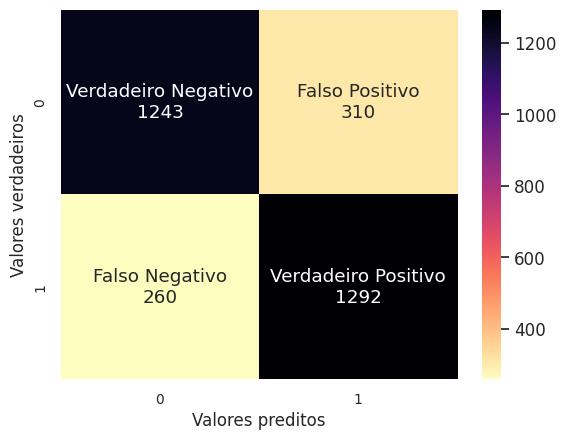

In [87]:
gerando_matriz(mc_knn, labels, categorias, cmap="magma_r")

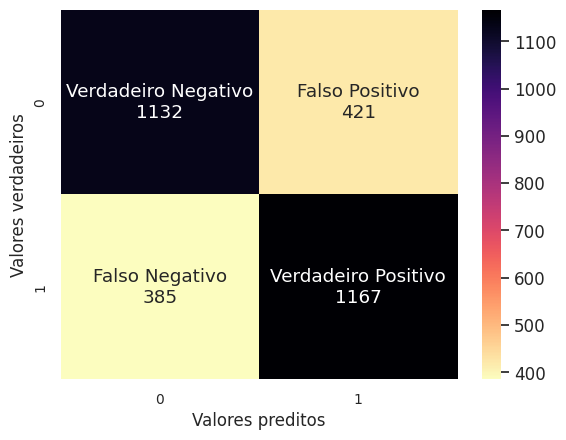

In [88]:
gerando_matriz(mc_bnb, labels, categorias, cmap="magma_r")


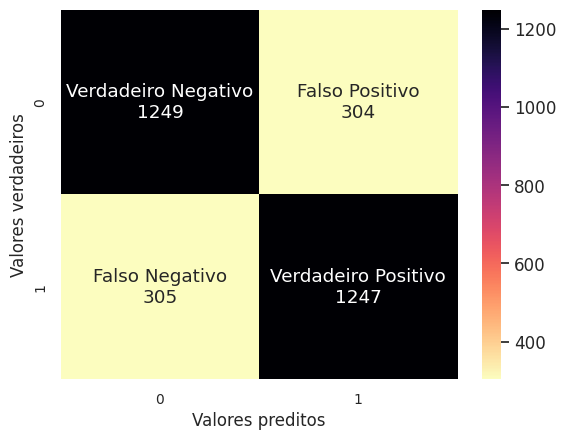

In [89]:
gerando_matriz(mc_dct, labels, categorias, cmap="magma_r")

## <font color = orange> 6.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [95]:
#Acurácia SVC
accuracy_svc = accuracy_score(y_teste, previsoes_svc)
print(f"Acurácia do SVC: {accuracy_svc * 100:.2f}%")

Acurácia do SVC: 83.67%


In [96]:
#Acurácia do KNN
accuracy_knn = accuracy_score(y_teste, previsoes_knn)
print(f"Acurácia do SVC: {accuracy_knn * 100:.2f}%")

Acurácia do SVC: 81.64%


In [97]:
#Acurácia Naive Bayes
accuracy_bnb = accuracy_score(y_teste, previsoes_bnb)
print(f"Acurácia do SVC: {accuracy_bnb * 100:.2f}%")


Acurácia do SVC: 74.04%


In [98]:
#Acurácia do Decion Tree
accuracy_dct = accuracy_score(y_teste, previsoes_dct)
print(f"Acurácia do SVC: {accuracy_dct * 100:.2f}%")

Acurácia do SVC: 80.39%


## <font color = orange> 6.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [99]:
from sklearn.metrics import precision_score

#Precisão SVC
precision_svc = precision_score(y_teste, previsoes_svc)
print(f"Precisão do SVC: {precision_svc * 100:.2f}%")

#Precisão KNN
precision_knn = precision_score(y_teste, previsoes_knn)
print(f"Precisão do KNN: {precision_knn * 100:.2f}%")

#Precisão Naive Bayes
precision_bnb = precision_score(y_teste, previsoes_bnb)
print(f"Precisão do Naive Bayes: {precision_bnb * 100:.2f}%")

#Precisão Decision Tree
precision_dct = precision_score(y_teste, previsoes_dct)
print(f"Precisão da Decision Tree: {precision_dct * 100:.2f}%")


Precisão do SVC: 84.72%
Precisão do KNN: 80.65%
Precisão do Naive Bayes: 73.49%
Precisão da Decision Tree: 80.40%


## <font color = orange> 6.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [100]:
from sklearn.metrics import recall_score
#Recall SVC
recall_svc = recall_score(y_teste, previsoes_svc)
print(f"Recall do SVC: {recall_svc * 100:.2f}%")

#Recall KNN
recall_knn = recall_score(y_teste, previsoes_knn)
print(f"Recall do KNN: {recall_knn * 100:.2f}%")

#Recall Naive Bayes
recall_bnb = recall_score(y_teste, previsoes_bnb)
print(f"Recall do Naive Bayes: {recall_bnb * 100:.2f}%")

#Recall Decision Tree
recall_dct = recall_score(y_teste, previsoes_dct)
print(f"Recall da Decision Tree: {recall_dct * 100:.2f}%")


Recall do SVC: 82.15%
Recall do KNN: 83.25%
Recall do Naive Bayes: 75.19%
Recall da Decision Tree: 80.35%


## <font color = orange> 6.5 - Escolhendo o melhor modelo

In [104]:
print("SVC:")
print(f"  Acurácia: {accuracy_svc * 100:.2f}%")
print(f"  Precisão: {precision_svc * 100:.2f}%")
print(f"  Recall: {recall_svc * 100:.2f}%")

print("\nKNN:")
print(f"  Acurácia: {accuracy_knn * 100:.2f}%")
print(f"  Precisão: {precision_knn * 100:.2f}%")
print(f"  Recall: {recall_knn * 100:.2f}%")

print("\nNaive Bayes:")
print(f"  Acurácia: {accuracy_bnb * 100:.2f}%")
print(f"  Precisão: {precision_bnb * 100:.2f}%")
print(f"  Recall: {recall_bnb * 100:.2f}%")

print("\nDecision Tree:")
print(f"  Acurácia: {accuracy_dct * 100:.2f}%")
print(f"  Precisão: {precision_dct * 100:.2f}%")
print(f"  Recall: {recall_dct * 100:.2f}%")

# Escolhendo o melhor modelo (considerando a acurácia como principal métrica)
melhor_modelo = max([(accuracy_svc, "SVC"), (accuracy_knn, "KNN"), (accuracy_bnb, "Naive Bayes"), (accuracy_dct, "Decision Tree")])[1]
print(f"\nO melhor modelo considerando a acurácia é: {melhor_modelo}")


SVC:
  Acurácia: 83.67%
  Precisão: 84.72%
  Recall: 82.15%

KNN:
  Acurácia: 81.64%
  Precisão: 80.65%
  Recall: 83.25%

Naive Bayes:
  Acurácia: 74.04%
  Precisão: 73.49%
  Recall: 75.19%

Decision Tree:
  Acurácia: 80.39%
  Precisão: 80.40%
  Recall: 80.35%

O melhor modelo considerando a acurácia é: SVC
